IP_Mean            0
IP_Sd              0
IP_Kurtosis        0
IP_Skewness        0
DM-SNR_Mean        0
DM-SNR_Sd          0
DM-SNR_Kurtosis    0
DM-SNR_Skewness    0
target_class       0
dtype: int64


Text(0, 0.5, 'DM-SNR_Skewness')

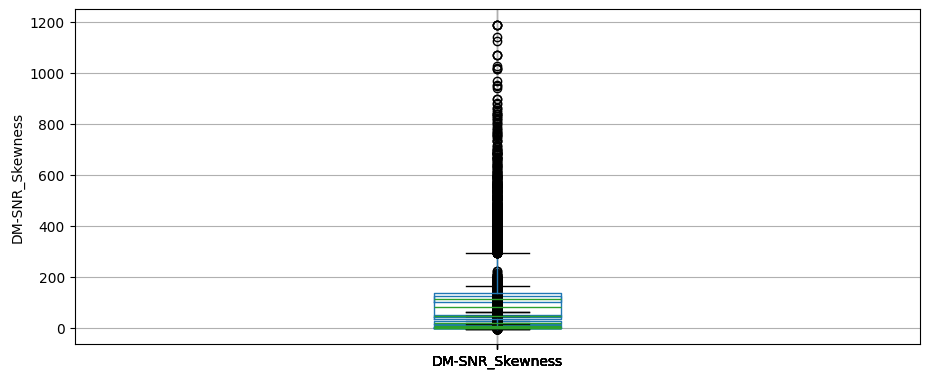

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
data = pd.read_csv('pulsar_stars.csv')

# remove column white space
data.columns = data.columns.str.strip()

# create a dataframe
df = pd.DataFrame(data)

# Print the first 5 rows of the dataframe
#print(df.head())

# Check for null values
print(df.isnull().sum())

# Print the distribution of the target class (RFI noice vs. Pulsar examples)
distribution = df['target_class'].value_counts()

# Calculate the percentage of each class
def distribution_percentage(distribution):
  percentage_rfi = distribution[0] / distribution.sum() * 100
  percentage_example = distribution[1] / distribution.sum() * 100
  return [percentage_rfi, percentage_example]

percentage = distribution_percentage(distribution)
#print("RFI:", percentage[0], "Example:", percentage[1])

plt.figure(figsize=(24, 20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP_Mean')
fig.set_title('')
fig.set_ylabel('IP_Mean') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP_Sd')
fig.set_title('')
fig.set_ylabel('IP_Sd') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP_Kurtosis')
fig.set_title('')
fig.set_ylabel('IP_Kurtosis') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP_Skewness')
fig.set_title('')
fig.set_ylabel('IP_Skewness') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='DM-SNR_Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR_Mean') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='DM-SNR_Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR_Sd') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='DM-SNR_Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR_Kurtosis') 

plt.subplot(4, 2, 1)
fig = df.boxplot(column='DM-SNR_Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR_Skewness') 


In [39]:
x = df.drop('target_class', axis=1)
y = df['target_class']

# Split the data into a training and a test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
x_train = scaler.fit_transform(x_train)

# Transform the test data
x_test = scaler.transform(x_test)

df1 = pd.DataFrame(x_train)
df2 = pd.DataFrame(x_test)

print(df1.head())
print(df2.head())


### Hvorfor er det nu at vi ønsker at skalere data?
# Vi kan opskalere og nedskalere data så det passer til vores træningsmodel, så vi kan få en bedre præcision.
# Så eksempelvis nogle kollonner ikke vægter mere end andre.

### Hvordan gør vi det?
# Vi bruger StandardScaler fra sklearn.preprocessing, som vi først fitter til vores træningsdata og derefter transformerer vores træningsdata.
# Vi transformerer også vores testdata, så det passer til vores træningsdata.
# Vi kan også bruge MinMaxScaler, som scaler data mellem 0 og 1.

          0         1         2         3         4         5         6  \
0  0.107361  0.109085 -0.445870 -0.220707 -0.256989 -0.070929 -0.541070   
1 -0.090774  0.147385 -0.269544 -0.285263 -0.328577 -0.429661  0.040586   
2 -0.226630 -0.266272 -0.296572 -0.209545 -0.340299 -0.453140 -0.021067   
3  0.104308 -0.214371 -0.162544 -0.243378 -0.372834 -0.537674  0.751989   
4 -0.146643 -0.696426 -0.183377 -0.168156 -0.345617 -0.620645  0.151591   

          7  
0 -0.627108  
1 -0.190112  
2 -0.259280  
3  0.434867  
4  0.041797  
          0         1         2         3         4         5         6  \
0 -0.176867 -0.026844 -0.033696 -0.307310  2.751625  3.415691 -1.800194   
1 -1.904520 -1.275561  2.392131  1.776573  0.998873  2.271875 -1.468115   
2 -0.144811 -0.439903 -0.259998 -0.260455 -0.336268 -0.488963  0.038800   
3  0.286568 -1.073187 -0.292939 -0.214051 -0.371805 -0.767203  0.918031   
4 -0.749902 -1.748692  0.206115  0.189034 -0.344073 -0.395332  0.174440   

          7  


In [40]:
# Import svc from sklearn
from sklearn.svm import SVC

# Create a support vector classifier
svc = SVC()

# Fit the classifier to the training data
svc.fit(x_train, y_train)

# Import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

# Predict the labels of the test set
y_pred = svc.predict(x_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9801675977653631
